Cargamos los datos de las listas

In [1]:
import pandas as pd
playlists = pd.read_csv('https://github.com/alcazar90/CC5205-3-proyecto/raw/main/data/2000_spotify_sample.csv.gz')

C:\Users\Diego\AppData\Local\Temp\ipykernel_3672\3858122505.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  playlists = pd.read_csv('https://github.com/alcazar90/CC5205-3-proyecto/raw/main/data/2000_spotify_sample.csv.gz')


Cargamos los datos de las canciones

In [2]:
tracks = pd.read_csv('https://github.com/alcazar90/CC5205-3-proyecto/raw/main/data/tracks_features/2000_tracks_sample.csv.gz')
cols=tracks.columns
tracks.columns=[col[15:] if col[:15]=="audio_features." else col for col in cols]
tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.628,0.870,5,-5.752,0,0.1080,0.01970,0.000000,0.118,0.8500,170.686,audio_features,5QxbGa4K41SPmY8zeyRs67,spotify:track:5QxbGa4K41SPmY8zeyRs67,https://api.spotify.com/v1/tracks/5QxbGa4K41SP...,https://api.spotify.com/v1/audio-analysis/5Qxb...,227747,4
1,0.303,0.401,2,-13.932,1,0.0375,0.02280,0.768000,0.113,0.0974,155.822,audio_features,4y0Lt1KOuyhKGkGKFZjSlS,spotify:track:4y0Lt1KOuyhKGkGKFZjSlS,https://api.spotify.com/v1/tracks/4y0Lt1KOuyhK...,https://api.spotify.com/v1/audio-analysis/4y0L...,205333,4
2,0.830,0.508,5,-6.070,1,0.0613,0.02910,0.000000,0.240,0.7970,95.051,audio_features,265yhmmWClZfBmgNPzwOMP,spotify:track:265yhmmWClZfBmgNPzwOMP,https://api.spotify.com/v1/tracks/265yhmmWClZf...,https://api.spotify.com/v1/audio-analysis/265y...,195740,4
3,0.907,0.465,5,-7.123,0,0.2880,0.01750,0.000015,0.117,0.1880,141.957,audio_features,4ibj6HRTdzkfvlDgxSXxCp,spotify:track:4ibj6HRTdzkfvlDgxSXxCp,https://api.spotify.com/v1/tracks/4ibj6HRTdzkf...,https://api.spotify.com/v1/audio-analysis/4ibj...,211692,4
4,0.296,0.852,4,-5.095,1,0.0439,0.00113,0.678000,0.141,0.5840,160.119,audio_features,6ZJyUCbGB4FFIuI8jiuafp,spotify:track:6ZJyUCbGB4FFIuI8jiuafp,https://api.spotify.com/v1/tracks/6ZJyUCbGB4FF...,https://api.spotify.com/v1/audio-analysis/6ZJy...,307050,4


Limpiamos los datos eliminando las canciones que duran más de 15 minutos ya que son posibles podcasts y eliminando datos 'NA'.

In [3]:
var_names=["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]

tracks_clean=tracks[tracks["duration_ms"]<900000].dropna(how="any")
print(tracks_clean.shape)

(57552, 18)


In [4]:
playlists.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description,pos,artist_name,track_uri,artist_uri,track_name,album_uri,album_name
0,music,False,521,1506643200,127,108,1,45,219480,85,NaN,0.0,Charli XCX,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,spotify:artist:25uiPmTg16RbhZWAqwLBy5,After The Afterparty (feat. Lil Yachty),spotify:album:4Txd0wc4WAgnoxXx0SLAlw,After The Afterparty (feat. Lil Yachty)
1,music,False,521,1506643200,127,108,1,45,247160,85,NaN,1.0,The Chainsmokers,spotify:track:6RUKPb4LETWmmr3iAEQktW,spotify:artist:69GGBxA162lTqCwzJG5jLp,Something Just Like This,spotify:album:4JPguzRps3kuWDD5GS6oXr,Memories...Do Not Open
2,music,False,521,1506643200,127,108,1,45,223846,85,NaN,2.0,MAX,spotify:track:1sYSP7gKa5kdKIfhANfori,spotify:artist:1bqxdqvUtPWZri43cKHac8,Lights Down Low,spotify:album:2qmysBdftCYXRjYHTVK3qo,Hell's Kitchen Angel
3,music,False,521,1506643200,127,108,1,45,220293,85,NaN,3.0,Post Malone,spotify:track:3a1lNhkSLSkpJE4MSHpDu9,spotify:artist:246dkjvS1zLTtiykXe5h60,Congratulations,spotify:album:5s0rmjP8XOPhP6HhqOhuyC,Stoney
4,music,False,521,1506643200,127,108,1,45,201160,85,NaN,4.0,AJR,spotify:track:3E2Zh20GDCR9B1EYjfXWyv,spotify:artist:6s22t5Y3prQHyaHWUN1R1C,Weak,spotify:album:7LACXphpLTluKLFqHIZ1Qq,The Click


Creamos _tracks_info_ para acceder facilmente al título y artista de una canción según su _uri_.

In [5]:
tracks_info = playlists.drop_duplicates(subset=["track_uri"]).set_index("track_uri")[["track_name", "artist_name"]].loc[tracks_clean["uri"]]

Definimos una lista con todos los id ('pid'= playlist id) de cada playlist, sin repetirse

In [6]:
playlist_ids=list(set(playlists["pid"]))

Con esto ya podemos echar a correr los clasificadores. Haremos regresión logística para clasificar $N$ canciones (57552) en 2000 playlists. La librería LogisticRegression de Sklearn sólo permite clasificación donde cada dato tiene una sóla clase, pero que en nuestros datos una canción puede tener más de una playlist. Por ello, entrenamos 2000 modelos, 1 por cada clase, y luego contatenaremos los vectores $W$ para obtener un sólo clasificador multietiqueta.

In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

#Normalizamos los datos
X=np.asarray(tracks_clean[var_names])
X=(X-np.tile(np.mean(X, axis=0), (X.shape[0], 1)))/np.tile(np.std(X, axis=0), (X.shape[0], 1))

#Agregamos una columna de "unos". Debido a la alta dimensión de los datos, sólo trabajaremos con polinomio grado 1.
X_t=PolynomialFeatures(1).fit_transform(X)

#Inicializamos el vector W
W=np.zeros(0)
total=2000

#Almacenaremos en lists la lista a la que pertenece cada canción
lists=np.zeros(shape=(len(X), total))-1

for playlist_i in range(total):
    print(playlist_i) if (playlist_i % (total/10))==0 else None
    
    #Denotamos playlist_i por la i-ésima playlist. Guardaremos en this_playlist las filas correspondiente a la i-ésima playlist
    this_playlist=playlists[playlists["pid"]==playlist_ids[playlist_i]]
    
    #y corresponde al vector de largo N cuyo valor es 1 si la canción está en la playlist y 0 si no está en la playlist.
    y=1*tracks_clean["uri"].isin(this_playlist["track_uri"])
    
    if(sum(y))>0:
        #Registramos que las canciones pertenecen a la playlist
        lists[y==1, playlist_i]=playlist_i
        
        #Entrenamos la regresión logística para distinguir las canciones que están en esta playlist de las que no.
        clf=LogisticRegression(fit_intercept=False)
        clf.fit(X_t, y)
        
        #Guardamos el vector W del clasificador logístico
        W=np.append(W, clf.coef_)

lists=np.asarray(lists)
W=W.reshape(-1, clf.coef_.size)


0
200
400
600
800
1000
1200
1400
1600
1800


Con la matriz $W$ correspondiente a concatenar todos los vectores de cada clasificador logístico (dimensión 2000 X 14 listas, dimensiones) calculamos la probabilidad de clase (playlist) de cada canción utilizando la función softmax. De esta manera, obtenemos la matriz "probas" de dimensión $N$ X 2000. De esta manera, aumentamos la dimensión de los datos a un vector que captura aquellas características de la canción que la hacen agruparse con otras canciones en la misma playlist.

También predecimos las playlists a la que pertenecería cada canción. Sólo se obtienen 459 playlists distintas de 2000. Esto no es problema, ya que el objetivo del algoritmo no es predecir a que playlist pertenecería una canción, sino que obtener el vector de probabilidad.

In [8]:
ret=np.exp(X_t @ W.T-10)
probas=ret/np.tile(np.apply_along_axis(sum, 1, ret), (W.T.shape[1],1)).T
y_p=[list(prob).index(max(prob)) for prob in probas]
print(len(set(y_p)))

459


Realizamos PCA para poder visualizar los atributos de las canciones y sus playlist predichas.

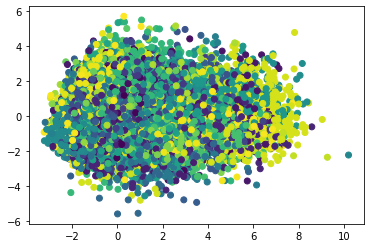

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_model=PCA(n_components=2).fit(X)
X_pca=pca_model.transform(X)


plt.scatter(X_pca.T[0], X_pca.T[1], c=y_p)

Teniendo $W$ y el vector de probabilidades, ahora somos capaces de recomendar canciones relacionadas a otra canción. Para esto, utilizando multiplicación matricial entre los atributos de una canción y $W$ obtenemos el vector de probabilidades para esa canción, y luego encontramos las canciones con menor distancia euclidiana. Si se utiliza _verbose=True_ podemos observar que las canciones retornadas no son las más cercanas a la canción input en cuanto a sus atributos, ni en cuanto a los componentes principales como se observa en el gráfico, ni pertenecen a la misma playlist. Así, podría esperarse que se están capturando atributos ocultos codificados en el vector de probabilidad de playlist que esperamos se relacionen a preferencias de los usuarios.

,track_name,artist_name
track_uri,,
spotify:track:6b7Ky6vF72YwjaHrH2OaJX,Come And Get It,Ralph Robles
spotify:track:2hwXsSTs5oY2ffPgHtgRf7,Stay Loose,BRONCHO
spotify:track:2hmibAtdObO8F4tnhLENuQ,Reptilia,The Strokes
spotify:track:6wbgdxmiJrtDTo9Jcjl1MW,Star Wars Theme - Disco,Intergalactic Symphony Orchestra
spotify:track:0aqHLuQIKPIIfnXIGRR0Ug,Zeplike,Slightly Stoopid
spotify:track:5Goc5Aehb8kFUN9w6nV9u4,Travelin' Band - Remake Take,Creedence Clearwater Revival
spotify:track:4CRpOsjhvgxjF7rQufmyZ1,Inbetween Days,The Cure
spotify:track:46Y1VsEbWAQ7dIZe1gpnve,You Only Live Once,The Strokes
spotify:track:1uEBiGPoSXyrIb37qNXKEc,Interzone - 2007 Remastered Version,Joy Division


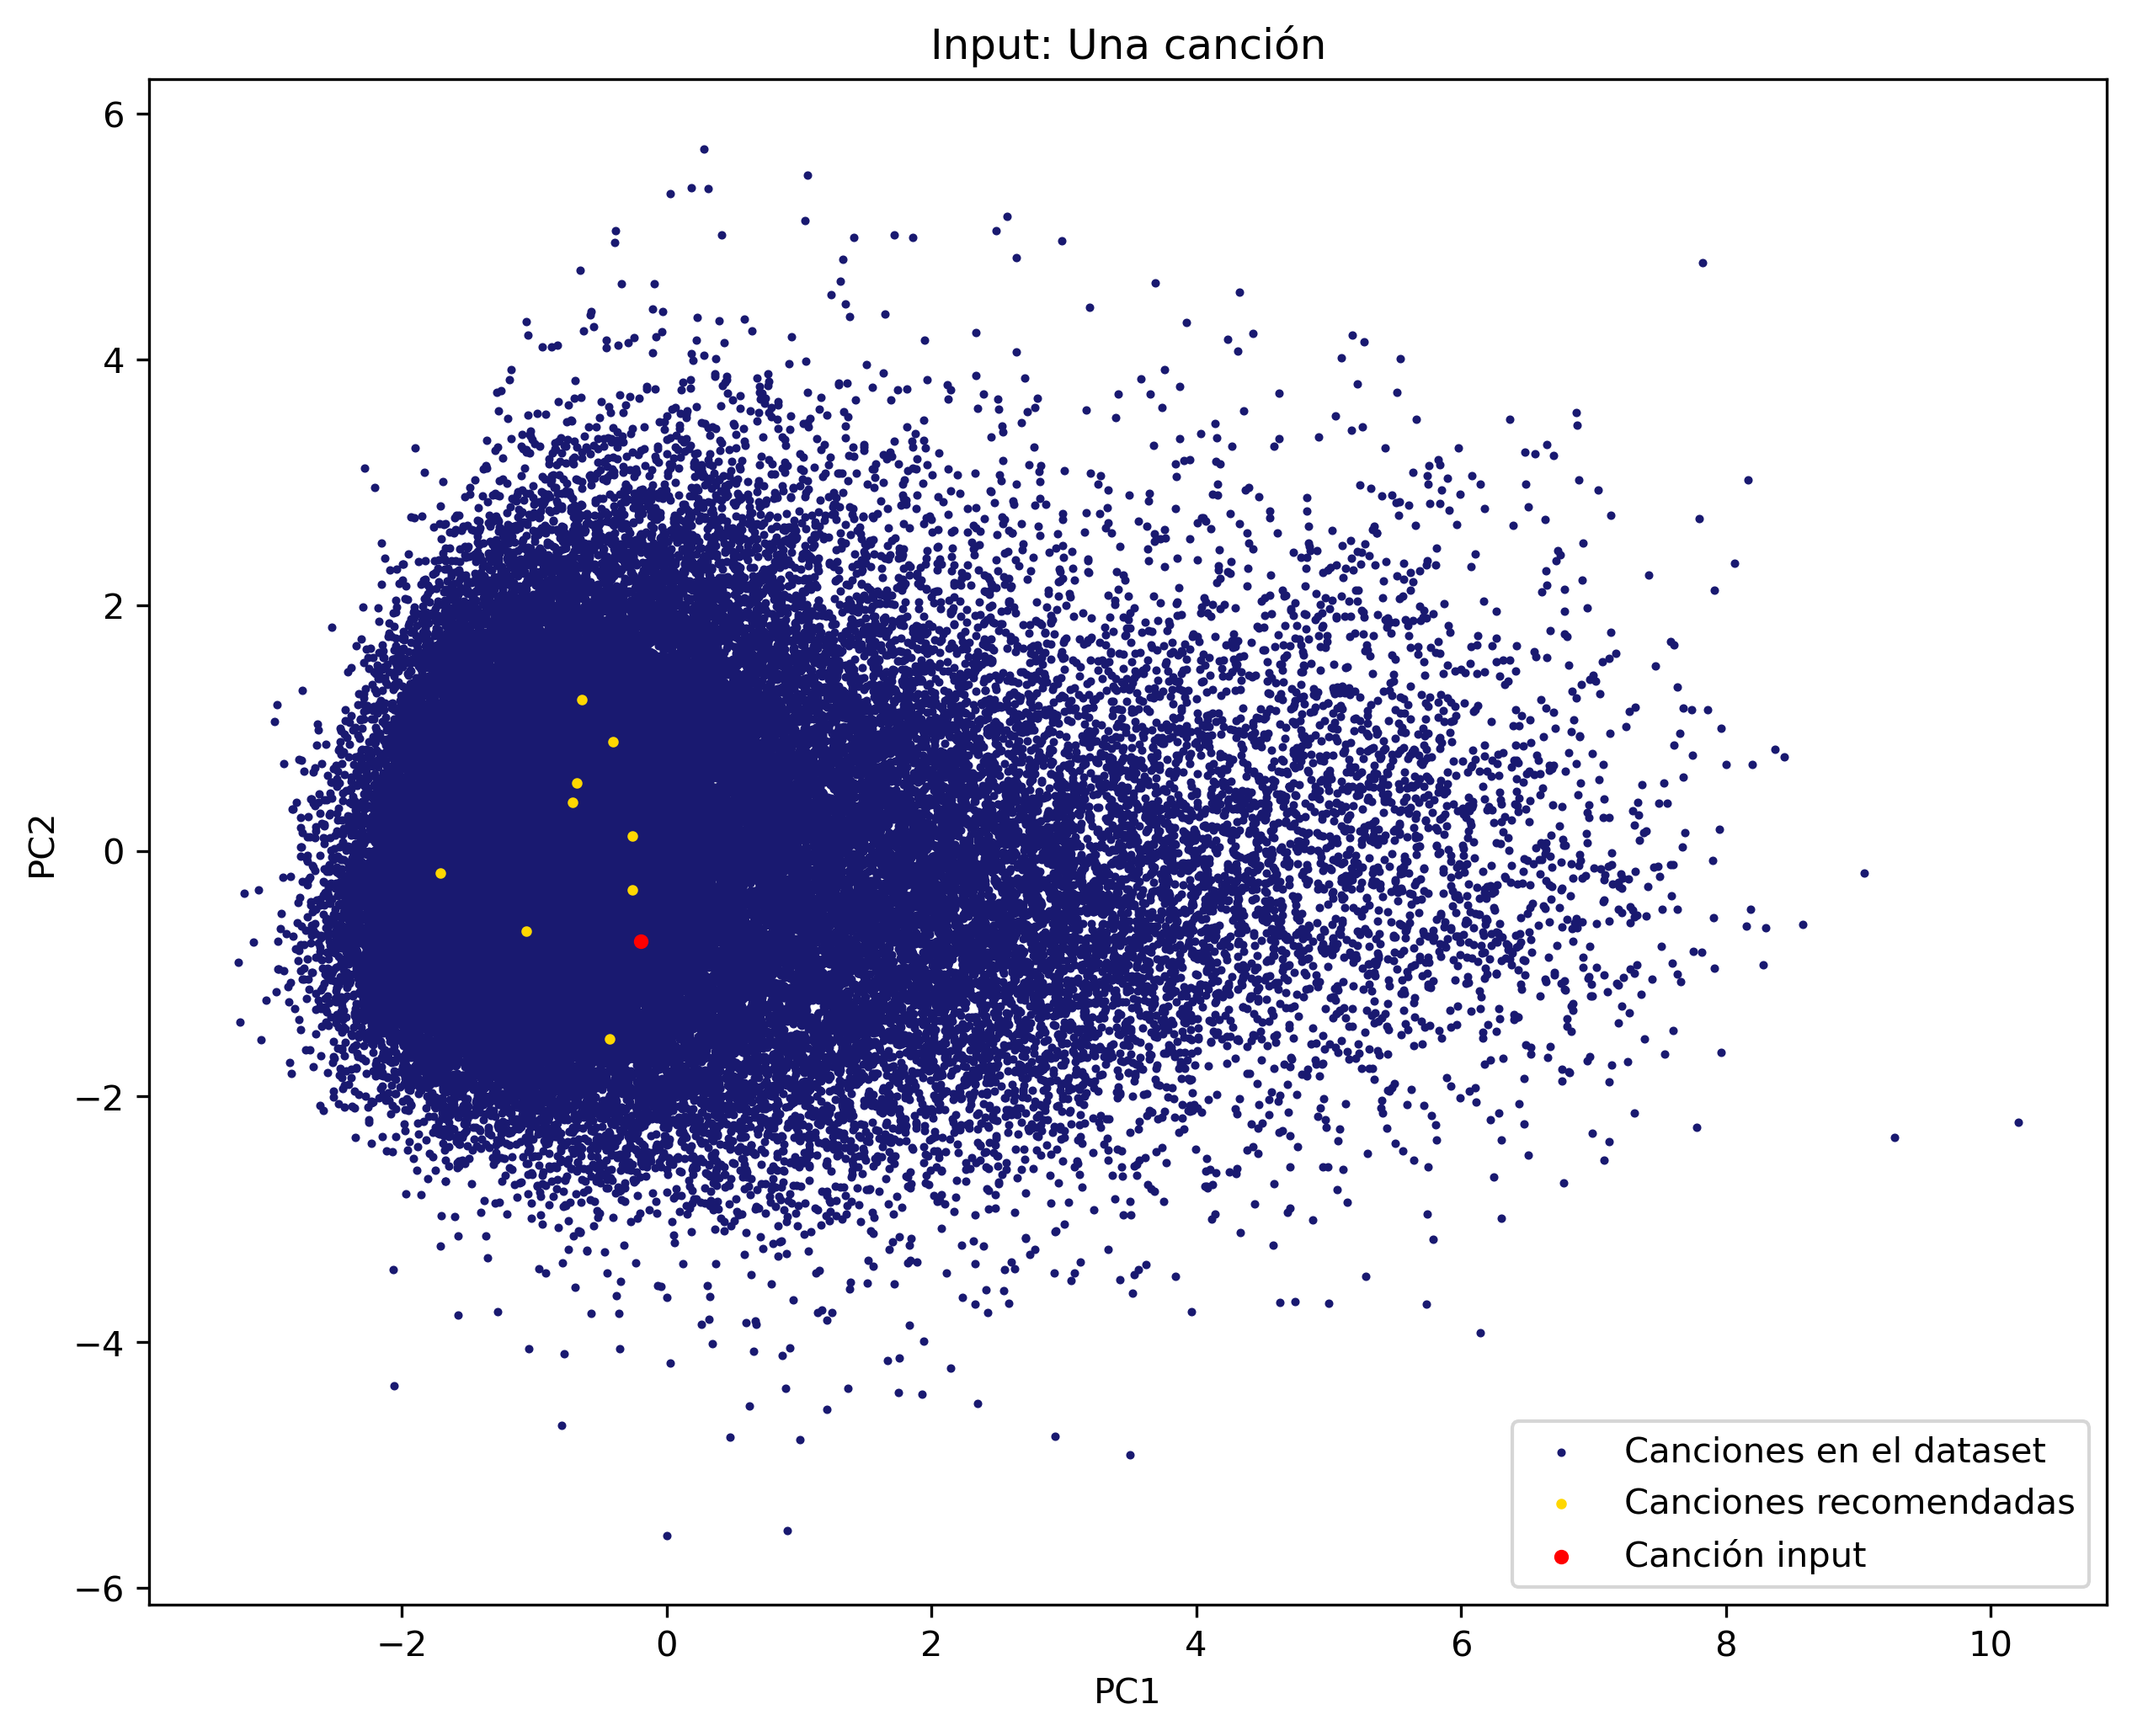

In [67]:
def recommend(ind, number=100, verbose=False):
    #cancion será nuestra canción input, como vector de 13 atributos + 1. Number es el número de recomendaciones.
    cancion = X_t[ind] if type(ind) == int else ind
    
    #Utilizamos la función softmax para obtener el vector de probabilidades de lista para la canción input
    this_ret=np.exp(cancion @ W.T-10)
    this_proba=this_ret/sum(this_ret)
    
    #Definimos una lista con las distancias euclidianas entre el vector de probabilidades de nuestra canción y el resto
    distancia_proba=np.asarray([np.linalg.norm(this_proba-proba) for proba in probas])
    
    #Ordenaremos según estas distancias. Los índices de los pimeros [number] elementos quedarán almacenados.
    order=np.argsort(distancia_proba)
    
    #y_close es un vector tamaño N con valor 1 para las [number] canciones con menor distancia al vector de la canción input.
    y_close=np.zeros(len(X))
    y_close[order[:number]]=1
    
    #Se grafican los componentes principales de las canciones recomendadas en amarillo, el input en rojo y el resto en azul.
    fig, ax=plt.subplots(figsize=(10,8), dpi=300)
    ax.scatter(X_pca[y_close==0].T[0], X_pca[y_close==0].T[1], c="midnightblue", s=2, label="Canciones en el dataset")
    ax.scatter(X_pca[y_close==1].T[0], X_pca[y_close==1].T[1], c="gold", s=4, label="Canciones recomendadas")
    cancion_pca=pca_model.transform(cancion[1:].reshape(1,-1))
    ax.scatter(cancion_pca[0][0], cancion_pca[0][1], c="red", s=10, label="Canción input")
    ax.legend()
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title("Input: Una canción")
    fig.savefig("modelo_2_single.png")
    
    if verbose:
        #De requerirlo, se entrega el ranking de distancia entre los atributos de las canciones recomendadas y el input.
        dist_ori=np.asarray([np.linalg.norm(cancion-point) for point in X_t])
        order_ori=np.argsort(np.argsort(dist_ori[order]))[:number]
        
        #También se entregarán las listas a las que pertenecía cada canción.
        print([list(pl[pl>=0]) for pl in lists[order][:number]])
        print(order_ori)
    
    return tracks_info.iloc[order][:number]

recommend(5000, number=10)



Para utilizar como input una lista de canciones, aplicamos un algoritmo similar. Para cada canción input ordenamos las canciones del dataset según su similitud en el vector de probabilidades. A las más cercanas al input le asignamos score 1, y este score decae exponencialmente para posiciones más altas. Luego se suman los scores y se recomiendan las canciones con score más alto.

La tasa de decaimiento exponencial está relacionada con 2 factores: el número de canciones en el input y la variable _suavizado_. Mientras más canciones, más drástico el decaimiento exponencial. Ej. Para $suavizado=1000$ y 10 canciones en input, el score decae $e$ veces cada $\frac{1000}{10}=100$ posiciones.

In [68]:
def recommend_list(canciones, suavizado=1000, number=100):
    #canciones representa el vector de atributos de los input. Normalizamos. Reshape permitirá trabajar con una sóla canción
    canciones=np.asarray(canciones).reshape(-1, 13)
    X_ori=np.asarray(tracks_clean[var_names])
    canciones=(canciones-np.tile(np.mean(X_ori, axis=0), (canciones.shape[0], 1)))/np.tile(np.std(X_ori, axis=0), (canciones.shape[0], 1))
    
    #Transformamos los datos con el mismo pipeline realizado para entrenar el modelo.
    canciones_t=PolynomialFeatures(1).fit_transform(canciones)
    
    #Obtenemos el vector de probabilidades de las canciones input mediante softmax
    matmult=np.exp(canciones_t @ W.T-10)
    probas_canciones=matmult/np.tile(np.apply_along_axis(sum, 1, matmult), (W.T.shape[1],1)).T
    
    #Inicializamos el vector de puntajes de las potenciales recomendaciones
    puntajes=np.zeros(len(X))
    
    #Iteraremos con cada cancion en el input
    for this_proba in probas_canciones:
        #Lista de distancias entre el vector de probabilidades de una canción input y las canciones del dataset
        distancia_proba=np.asarray([np.linalg.norm(this_proba-proba) for proba in probas])
        
        #Argsort da el indice que de la canción que debería ir en cada posición. Doble argsort da la posición de cada canción.
        order=np.argsort(np.argsort(distancia_proba))
        
        #Sumamos los puntajes según la posición en cercanía de cada canción.
        puntajes+=np.exp(-order*len(canciones)/suavizado)
        
    #final_order corresponde a las posibles recomendaciones ordenadas de mayor a menor score total
    final_order=np.argsort(-puntajes)
    
    #Vector y que es 1 si la canción es recomendada y 0 si no es recomendada.
    y_recom=np.zeros(len(X))
    y_recom[final_order[:number]]=1
    
    #Realizamos PCA para visualizar
    canciones_pca=pca_model.transform(canciones)
    
    #Se grafican los componentes principales de las canciones. Rojo = input. Amarillo = recomendadas. Morado = Otras.
    fig, ax=plt.subplots(figsize=(10,8), dpi=300)
    ax.scatter(X_pca[y_recom==0].T[0], X_pca[y_recom==0].T[1], c="midnightblue", s=2, label="Canciones en el dataset")
    ax.scatter(X_pca[y_recom==1].T[0], X_pca[y_recom==1].T[1], c="gold", s=4, label="Canciones recomendadas")
    ax.scatter(canciones_pca.T[0], canciones_pca.T[1], c="red", s=10, label="Canciones input")
    ax.legend()
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title("Input: Lista de canciones")
    fig.savefig("modelo_2_multi.png")
    
    #Se entregan los nombres y artistas de las canciones recomendadas
    return tracks_info.iloc[final_order][:number]


Utilizando esta función modificada para recomendar canciones utilizando el modelo ya entrenado, vemos las 20 mejores recomendaciones para 2 listas de 10 canciones. Primero una selección de canciones diversas en el dataset de entrenamiento.

,track_name,artist_name
track_uri,,
spotify:track:4QgXskMSq8jFNlCV0KLFRb,Watch Her Drive,Wade Bowen
spotify:track:1kRlt3v0NI6OLhyMkZZAee,Somewhere Down in Texas,Jason Boland & The Stragglers
spotify:track:5WxSN0lGv8Zj4xkedkG0Hr,When the Night Comes Falling from the Sky,Lucius
spotify:track:4ssCwrG2WRHV7QxLH91Xk8,"4th of July, Asbury Park (Sandy)",Bruce Springsteen
spotify:track:34yIb7hw5SuR80au1BHTtt,Oh Happy Day,The Edwin Hawkins Singers
spotify:track:4bjvLvKovcWqZwDbXT5QQX,Carry On,"Crosby, Stills, Nash & Young"
spotify:track:3skk6UIXV4kepq2bdYy97g,"I've Seen All Good People: a. Your Move, b. Al...",Yes
spotify:track:2Z9HbY480ypmz5JeG0PYia,Stupid Boy,Keith Urban
spotify:track:69irKXDsBc50ig7VUil8tX,Mailman,Soundgarden


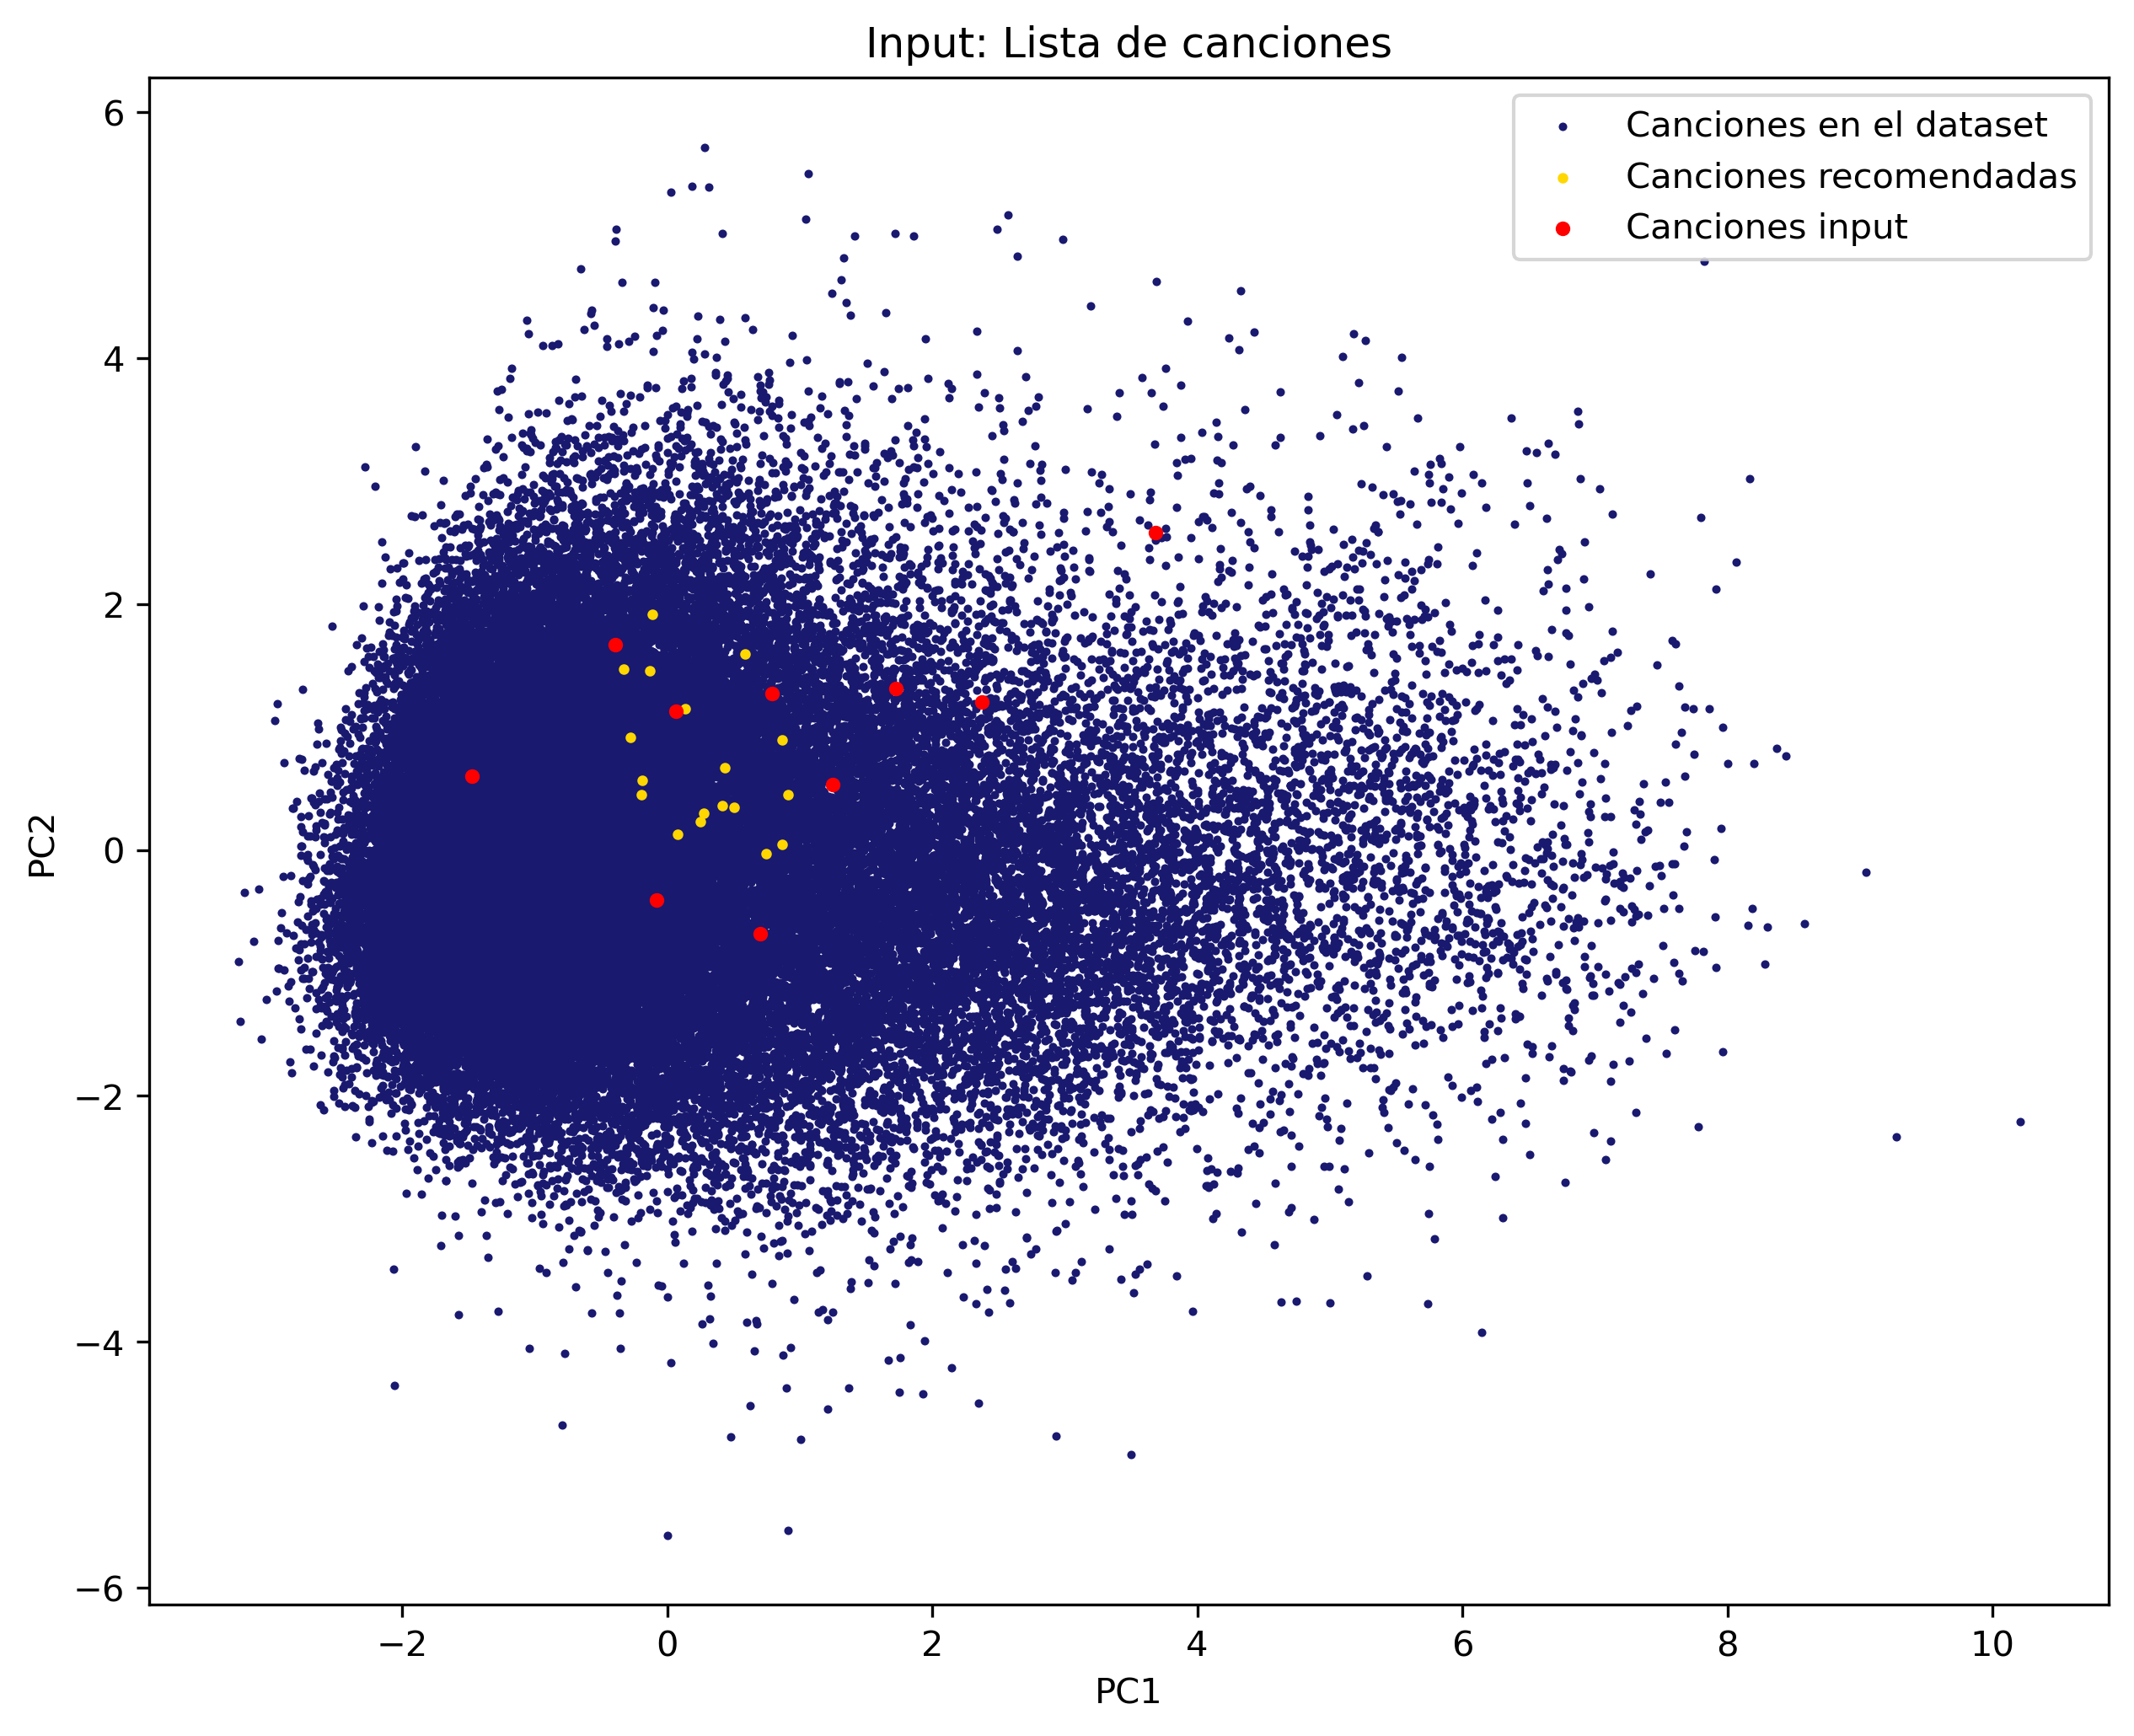

In [69]:
lista1=pd.read_csv("muestra_diego.csv")

recommend_list(np.asarray(lista1[var_names]), number=20)

Ahora con 10 canciones aleatoreas fuera del dataset de prueba.

,track_name,artist_name
track_uri,,
spotify:track:5KXQ15NLzgDKTWE8Cu18NJ,Take Your Time - Acoustic,fun.
spotify:track:2sZ0NjewprjfrkX1LStXs8,Girls From Texas (feat. Lyle Lovett),Pat Green
spotify:track:1MQEUAGuWlnZGrpXmCqJDU,I Hear You Calling,Gob
spotify:track:1aR72Q50h6UAH649Lq9cbp,Better Things - Stereo Mix,The Kinks
spotify:track:3dlHGh0R9gm8sfeW368K1S,I've Got This Friend,The Civil Wars
spotify:track:0E2v2DdCeGVBLOcRhQ8V38,Pass A Beer,Jake Owen
spotify:track:16ZQz5XIZpQHA7Il6v0XFK,I Got It,Filmore
spotify:track:6Spft2mhLcKXv3JZqmOMxf,Open All Night,Brian Fallon
spotify:track:3nAp4IvdMPPWEH9uuXFFV5,Underneath the Tree,Kelly Clarkson


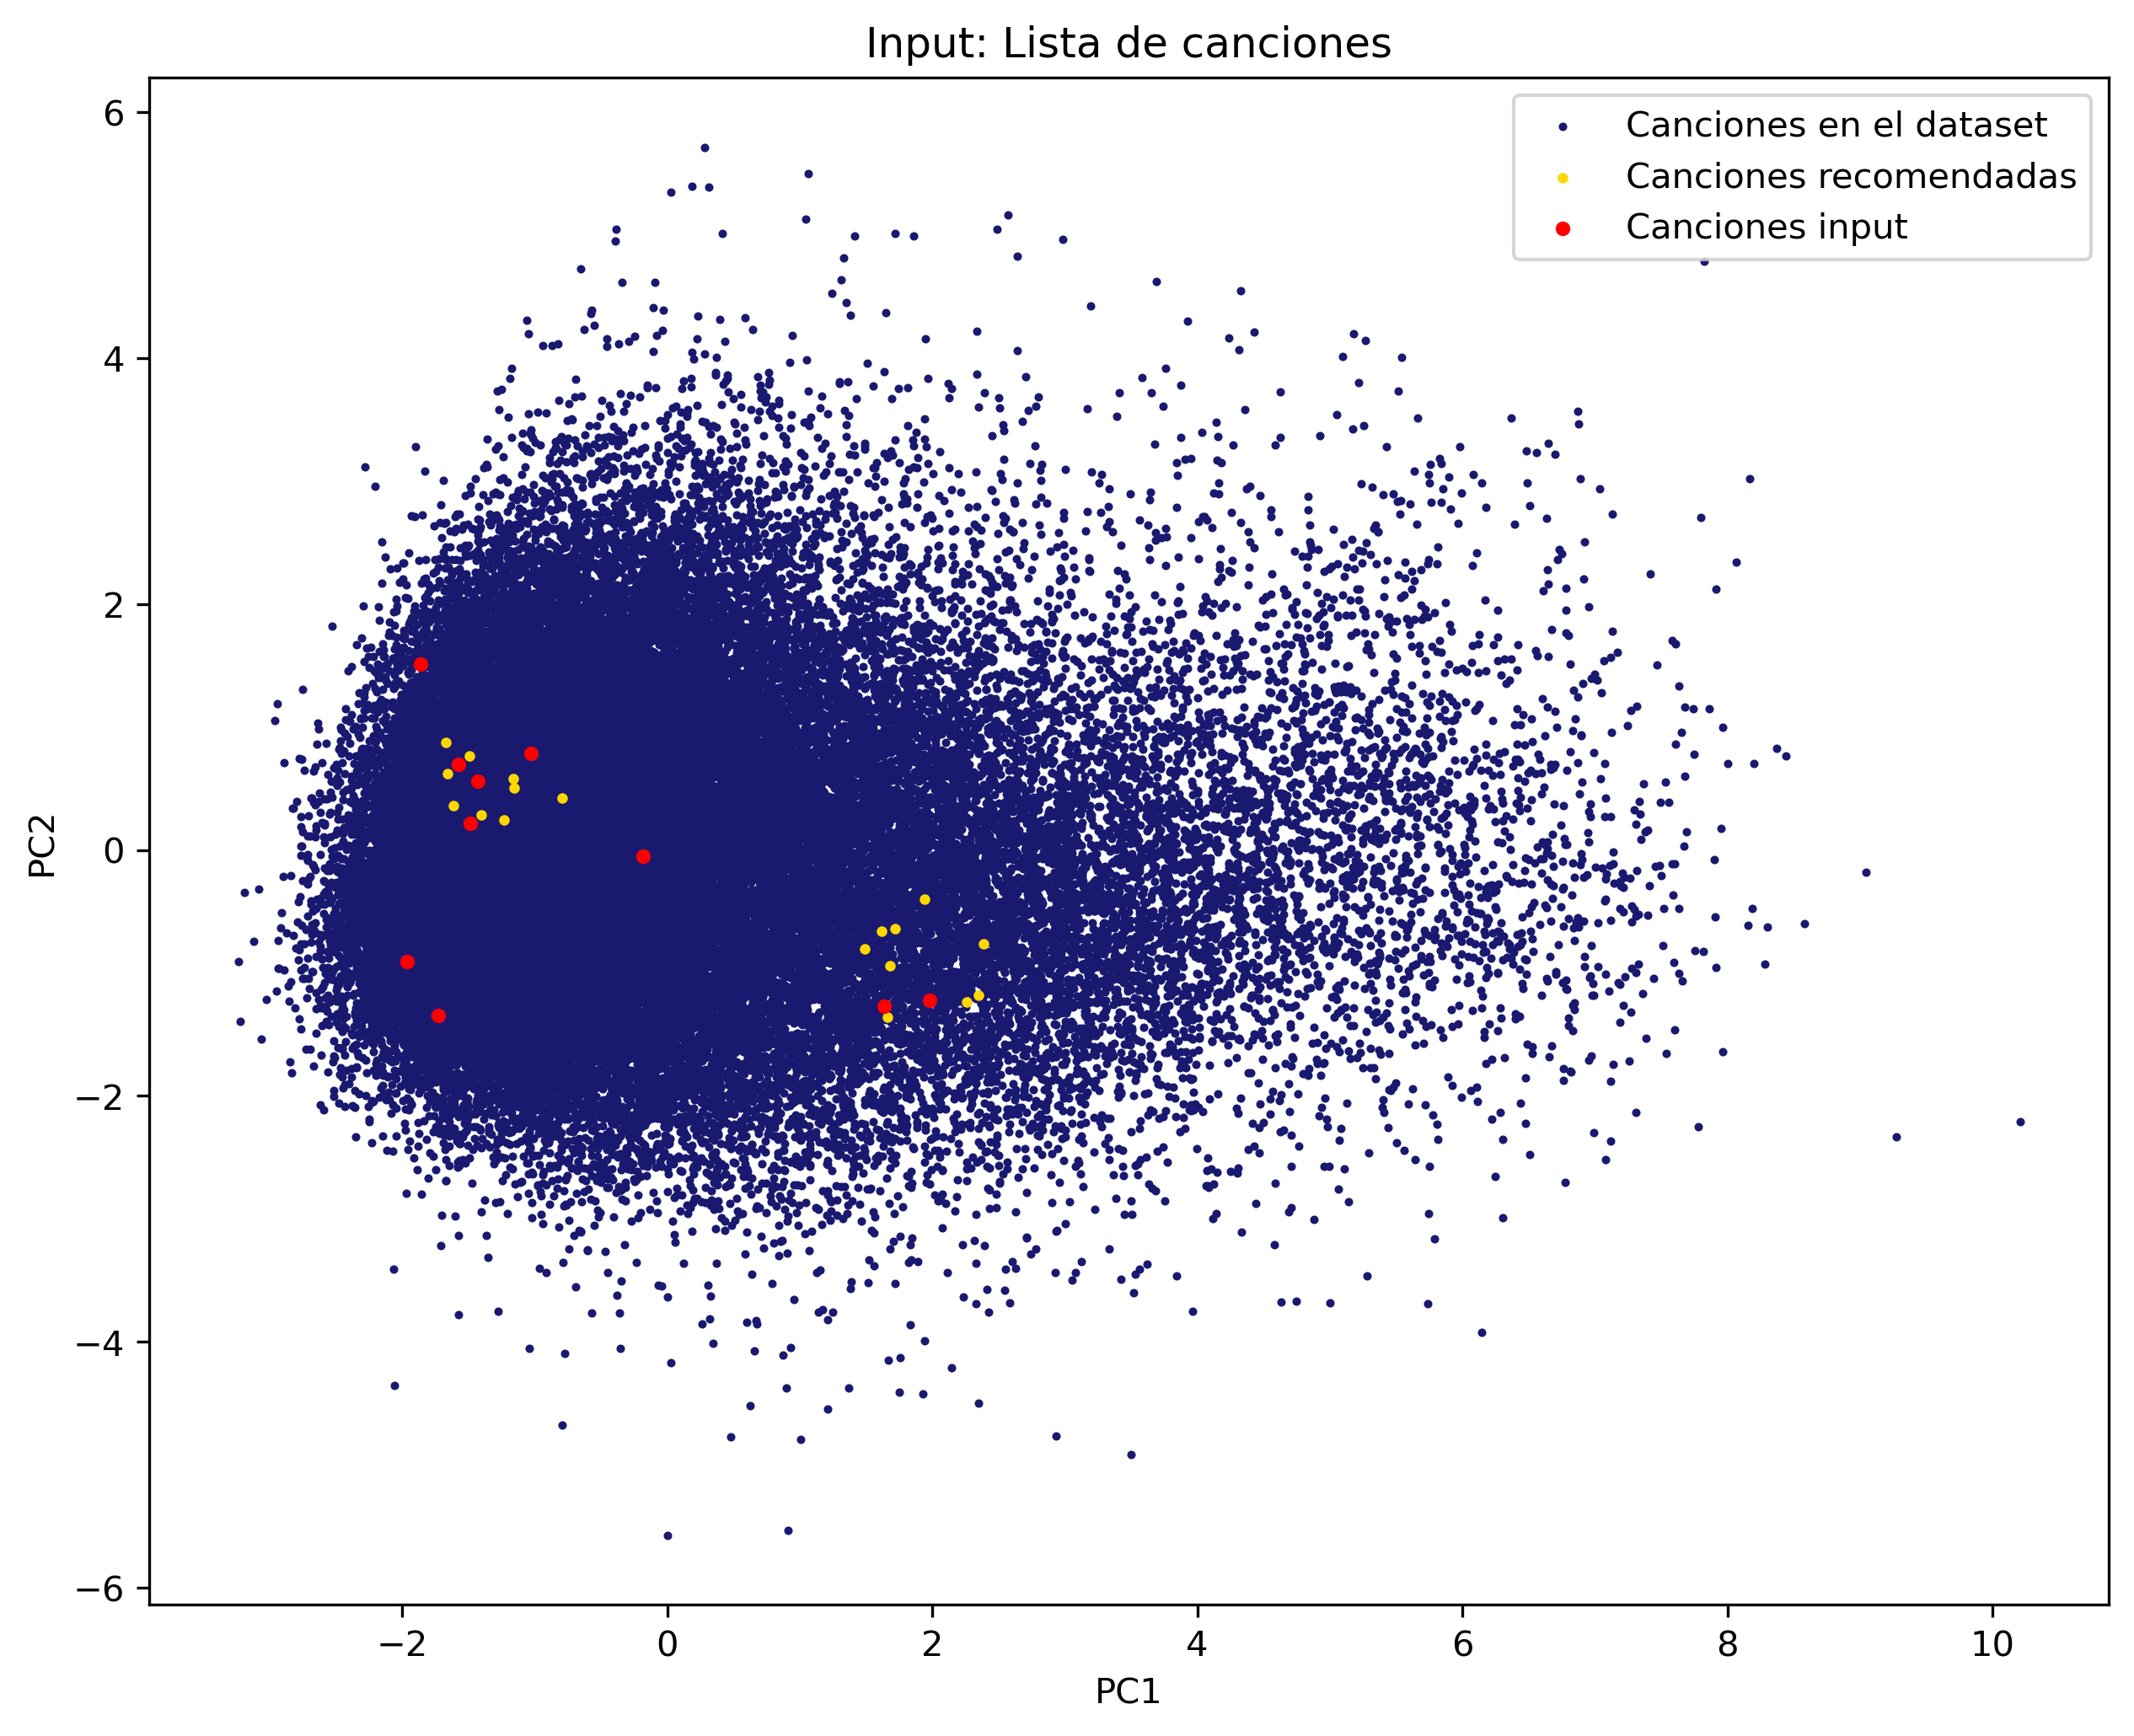

In [70]:
lista2=pd.read_csv("10_canciones_features_azar.csv")

recommend_list(np.asarray(lista2[var_names]), number=20)